<h1 style="font-size:20px">Import all the necessary libraries</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from encodings.aliases import aliases

# the matplotlib plots will appear directly below the cell in which the function was called.
%matplotlib inline

<h1 style="font-size:20px">Read the csv file and remove all the duplicates</h1>

In [267]:
# to find encodings that work

# Below line creates a set of all available encodings
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("/Users/sayed/Downloads/Kaggle Dataset/crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful cp1253
successful cp500
successful cp852
successful cp855
successful cp866
successful iso8859_8
successful mac_latin2
successful cp860
successful cp1255
successful cp1252
successful iso8859_16
successful cp858
successful mac_cyrillic
successful cp1256
successful mac_roman
successful iso8859_14
successful iso8859_13
successful cp857
successful big5hkscs
successful cp861
successful mac_greek
successful mac_turkish
successful iso8859_2
successful cp775
successful cp869
successful cp1251
successful iso8859_15
successful iso8859_4
successful iso8859_3
successful cp1250
successful iso8859_9
successful koi8_r
successful cp932
successful iso8859_11
successful cp949
successful latin_1
successful cp1140
successful gb18030
successful cp273
successful cp1258
successful kz1048
successful iso8859_10
successful cp1125
successful iso8859_6
successful hp_roman8
successful cp437
successful cp863
successful gbk
successful mac_iceland
successful cp1257
successful cp037
successful cp865
successf

In [17]:
# Read in the crime.csv file and use the timestamp as a datetime index
crime = pd.read_csv("/Users/sayed/Downloads/Kaggle Dataset/crime.csv", encoding="ISO-8859-11")

In [18]:
crime.head() # Quick check on how the dataset looks like

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2/9/18 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,21/8/18 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,3/9/18 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,3/9/18 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,3/9/18 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [20]:
crime.shape # Checking the shape of the data. It has 319,073 rows and 17 columns

(319073, 17)

In [23]:
crime.duplicated().sum() # Counting the duplicate rows

23

In [25]:
crime.drop_duplicates(inplace=True) # Dropping the duplicate rows

In [26]:
crime.shape # Checking the shape again to see if dropping the duplicate rows worked

(319050, 17)

<h1 style="font-size:20px">Explore the dataset</h1>

In [27]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2/9/18 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,21/8/18 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,3/9/18 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,3/9/18 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,3/9/18 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [28]:
crime.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,5/6/16 17:25,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,9/7/15 13:38,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,9/7/15 13:38,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,31/5/16 19:35,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,22/6/15 0:12,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [30]:
pd.options.display.max_rows = 10

In [31]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2/9/18 13:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,21/8/18 0:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,3/9/18 19:27,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,3/9/18 21:16,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,3/9/18 21:05,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,5/6/16 17:25,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,9/7/15 13:38,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,9/7/15 13:38,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,31/5/16 19:35,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [32]:
crime.info() # Summary information about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [33]:
# Changing the data type from object to datetime for the OCCURRED_ON_DATE column
crime.OCCURRED_ON_DATE=pd.to_datetime(crime.OCCURRED_ON_DATE)

In [34]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

In [36]:
crime.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [37]:
crime.OCCURRED_ON_DATE.dt.month

0         2
1         8
2         3
3         3
4         3
         ..
319068    5
319069    9
319070    9
319071    5
319072    6
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [38]:
crime.OCCURRED_ON_DATE.dt.week

/var/folders/lx/xc54m60d56l8q1cy14x9jf2h0000gn/T/ipykernel_1340/2588699237.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  crime.OCCURRED_ON_DATE.dt.week


0          6
1         34
2         10
3         10
4         10
          ..
319068    18
319069    37
319070    37
319071    22
319072    26
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [39]:
crime.OCCURRED_ON_DATE.dt.hour

0         13
1          0
2         19
3         21
4         21
          ..
319068    17
319069    13
319070    13
319071    19
319072     0
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [40]:
crime.OCCURRED_ON_DATE.dt.minute

0          0
1          0
2         27
3         16
4          5
          ..
319068    25
319069    38
319070    38
319071    35
319072    12
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int64

In [41]:
crime.describe() # summary information on the numeric columns

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [43]:
crime.describe(include='object') # summary information on the non-numeric columns

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [44]:
crime.columns # Checking all columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [53]:
crime.isnull() # Checking null values

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319069,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319070,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319071,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [55]:
np.sum(crime.isnull()) # Sum of null values in columns

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
                       ...  
UCR_PART                  90
STREET                 10871
Lat                    19998
Long                   19998
Location                   0
Length: 17, dtype: int64

In [56]:
# Checking for columns with missing values
crime.columns[np.sum(crime.isnull())!=0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [57]:
# Checking for columns with no missing values
crime.columns[np.sum(crime.isnull())==0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [64]:
# Checking for the number of unique values in each column
for col in crime.columns:
    unique_count=crime[col].nunique()
    print(col+" has "+str(unique_count)+" unique values")

INCIDENT_NUMBER has 282517 unique values
OFFENSE_CODE has 222 unique values
OFFENSE_CODE_GROUP has 67 unique values
OFFENSE_DESCRIPTION has 244 unique values
DISTRICT has 12 unique values
REPORTING_AREA has 879 unique values
SHOOTING has 1 unique values
OCCURRED_ON_DATE has 232566 unique values
YEAR has 4 unique values
MONTH has 12 unique values
DAY_OF_WEEK has 7 unique values
HOUR has 24 unique values
UCR_PART has 4 unique values
STREET has 4657 unique values
Lat has 18178 unique values
Long has 18178 unique values
Location has 18194 unique values


<h1 style="font-size:20px">Let's answer some questions</h1>

___1. What offense groups are the most frequent in reported crimes?___

In [69]:
crime.OFFENSE_CODE_GROUP.value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [70]:
crime.OFFENSE_CODE_GROUP.value_counts()[:10]

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18749
Other                              18073
Drug Violation                     16545
Simple Assault                     15826
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

Motor Vehicle Accident Response    11.638301
Larceny                             8.128820
Medical Assistance                  7.378154
Investigate Person                  5.876508
Other                               5.664629
Drug Violation                      5.185708
Simple Assault                      4.960351
Vandalism                           4.831218
Verbal Disputes                     4.105626
Towed                               3.537690
Name: OFFENSE_CODE_GROUP, dtype: float64

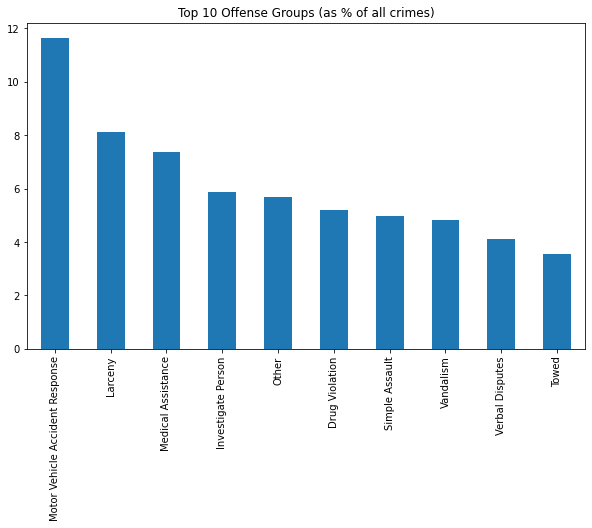

In [160]:
offense_group_values=crime.OFFENSE_CODE_GROUP.value_counts()[:10]

display(offense_group_values/crime.shape[0]*100)

# Creating a bar chart of the Top 10 offense groups
plt.figure(figsize=(10,6))
(offense_group_values / crime.shape[0]*100).plot(kind='bar');
plt.title('Top 10 Offense Groups (as % of all crimes)');

**The most common crimes in terms of offense group are "Motor Vehicle Accident Response", and "Larceny and vandalism". These two offense groups account for around 20% of all reported crimes.**

___2. What offense groups are the least frequent in reported crimes?___

In [82]:
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]

Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
INVESTIGATE PERSON                            4
HUMAN TRAFFICKING                             7
Gambling                                      8
Manslaughter                                  8
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: OFFENSE_CODE_GROUP, dtype: int64

**The least crimes includes "Burglary - No Property Taken", "HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE", "Biological Threat", and "INVESTIGATE PERSON".**

___3. What are the most common offenses reported?___

In [181]:
crime.OFFENSE_DESCRIPTION.value_counts()

SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
KILLING OF FELON BY POLICE                         1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON         1
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: OFFENSE_DESCRIPTION, Length: 244, dtype: int64

In [83]:
crime.OFFENSE_DESCRIPTION.value_counts()[:10]

SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
TOWED MOTOR VEHICLE                      11287
INVESTIGATE PROPERTY                     11124
LARCENY THEFT FROM BUILDING               9069
THREATS TO DO BODILY HARM                 9042
Name: OFFENSE_DESCRIPTION, dtype: int64

SICK/INJURED/MEDICAL - PERSON            5.887165
INVESTIGATE PERSON                       5.877762
M/V - LEAVING SCENE - PROPERTY DAMAGE    5.116126
VANDALISM                                4.749412
ASSAULT SIMPLE - BATTERY                 4.635950
VERBAL DISPUTE                           4.105626
TOWED MOTOR VEHICLE                      3.537690
INVESTIGATE PROPERTY                     3.486601
LARCENY THEFT FROM BUILDING              2.842501
THREATS TO DO BODILY HARM                2.834039
Name: OFFENSE_DESCRIPTION, dtype: float64

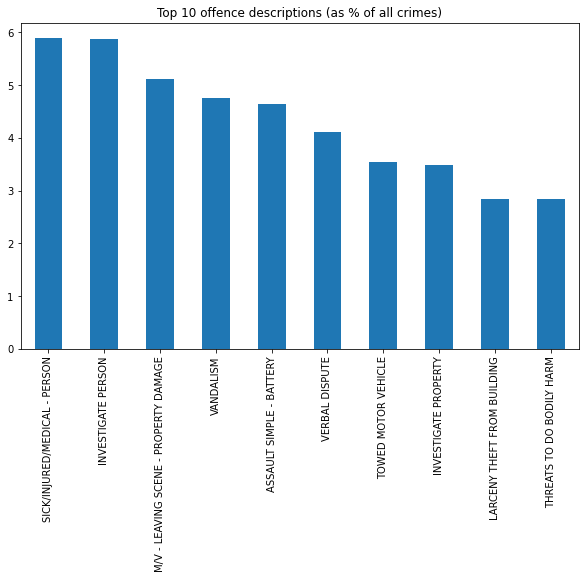

In [159]:
offense_des_values = crime.OFFENSE_DESCRIPTION.value_counts()[:10]

display(offense_des_values/crime.shape[0]*100)

plt.figure(figsize=(10,6))
(offense_des_values/crime.shape[0]*100).plot(kind='bar');
plt.title('Top 10 offence descriptions (as % of all crimes)');

**The most common crimes in terms of offense description are "SICK/INJURED/MEDICAL - PERSON", "Investigate Person", "M/V - LEAVING SCENE - PROPERTY DAMAGE", and "Other".**

___4. Which year has the highest number of reported crimes?___

In [91]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER']

YEAR
2015     53371
2016     99110
2017    100884
2018     65685
Name: INCIDENT_NUMBER, dtype: int64

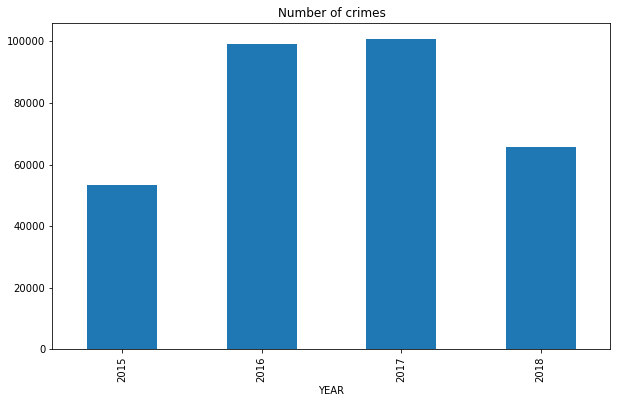

In [158]:
plt.figure(figsize=(10,6))
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title('Number of crimes');

**The year with the highest number of reported crimes in the dataset is 2017, with over 100,000 reported incidents.**

___5. Is there a pattern in the distribution of crimes across different days of the week?___

In [317]:
crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER']

DAY_OF_WEEK
Friday       45498
Monday       42832
Saturday     41891
Sunday       37996
Thursday     43665
Tuesday      43361
Wednesday    43809
Name: INCIDENT_NUMBER, dtype: int64

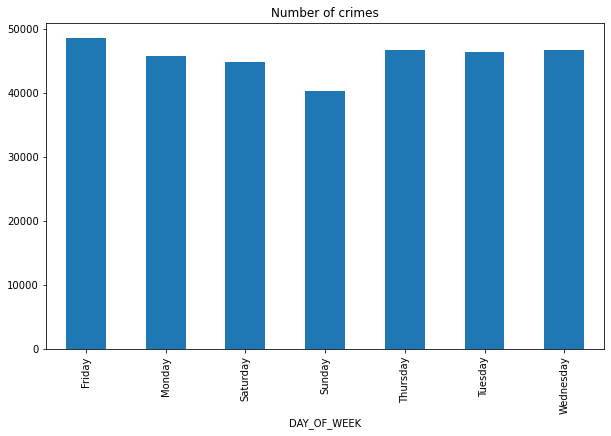

In [156]:
plt.figure(figsize=(10,6))
crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].plot(kind='bar');
plt.title('Number of crimes');

**There appears to be a higher number of reported crimes on Thursdays,and Fridays, and a lower number on Sundays.**

___6. Is there a pattern in the distribution of crimes across different hours of the day?___

In [327]:
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].nlargest(5)

HOUR
17    19168
18    18795
16    18572
12    17695
19    16438
Name: INCIDENT_NUMBER, dtype: int64

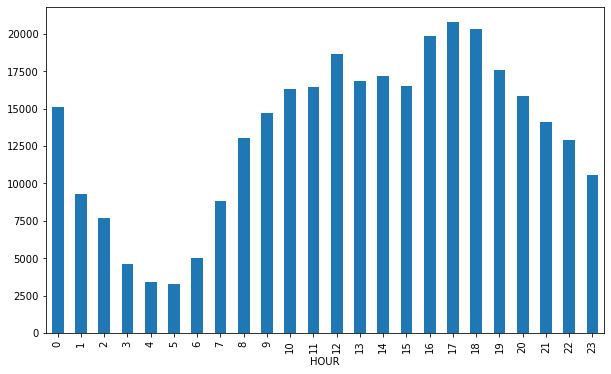

In [197]:
plt.figure(figsize=(10,6))
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar');

**There are more crimes reported during the evening and nighttime hours, with a peak around 4-6pm and another smaller peak around midnight.**

___7. On which days and during which hours are the most number of crimes reported?___

In [98]:
crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
...,...,...,...,...,...,...,...
19,2564,2606,2301,2114,2510,2768,2724
20,2307,2319,2131,2109,2349,2369,2265
21,2089,2003,2077,1902,2070,1925,2043


In [99]:
week_and_hour = crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

In [100]:
week_and_hour.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

Text(0.5, 1.0, 'Count of crimes committed by Weekdays and Hours')

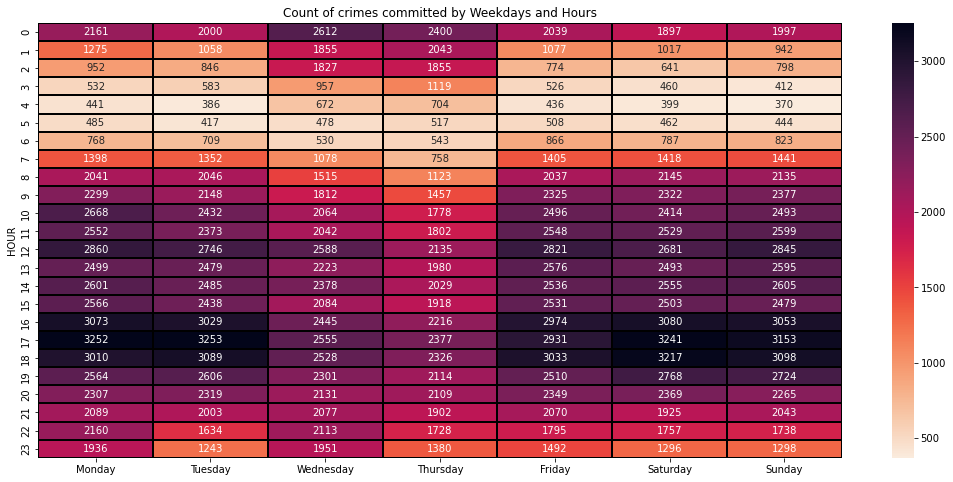

In [263]:
plt.figure(figsize=(18,8))
sns.heatmap(week_and_hour, cmap=sns.color_palette("rocket_r", as_cmap=True),
            linewidth=.03, linecolor="Black", annot=True, fmt=".0f" )
plt.title('Count of crimes committed by Weekdays and Hours')

**The most crimes are committed on Fridays,and Saturdays during the evening and nighttime hours.**

___8. Which streets and during which hours have the highest number of reported crimes?___

WASHINGTON ST        4.718577
BLUE HILL AVE        2.337052
BOYLSTON ST          2.319998
DORCHESTER AVE       1.674291
TREMONT ST           1.559595
MASSACHUSETTS AVE    1.467972
CENTRE ST            1.433196
HARRISON AVE         1.429183
COMMONWEALTH AVE     1.293086
HYDE PARK AVE        1.137929
Name: STREET, dtype: float64

Text(0.5, 1.0, 'Crimes count by Top 10 Streets')

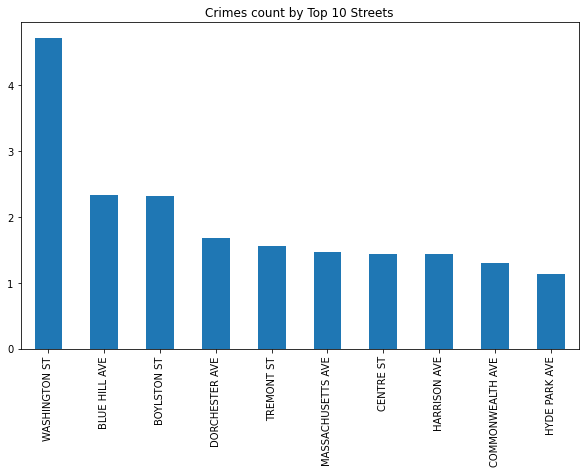

In [329]:
crime.STREET.value_counts()[:10]

street_crime_values = crime.STREET.value_counts()[:10]

display(street_crime_values/crime.shape[0]*100)

plt.figure(figsize=(10,6))
(street_crime_values/crime.shape[0]*100).plot(kind='bar')
plt.title('Crimes count by Top 10 Streets')

In [254]:
# Get the top 5 streets by crime count
top_5_streets = crime.STREET.value_counts().nlargest(5).index.tolist()

In [255]:
# Filter the crime DataFrame to include only the top 5 streets
crime_top5 = crime[crime['STREET'].isin(top_5_streets)]

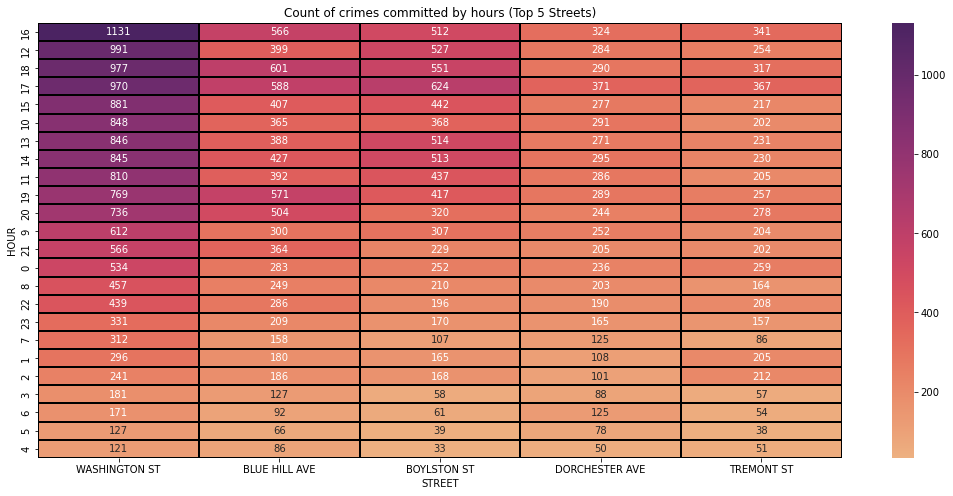

In [357]:
# Group the filtered DataFrame by hour and street and sort by crime count in descending order
crime_by_hour_top5 = crime_top5.groupby(['HOUR', 'STREET']).size().unstack().\
                      loc[:, top_5_streets].sort_values(by=top_5_streets, ascending=False)
# Create the heatmap
plt.figure(figsize=(18,8))
sns.heatmap(crime_by_hour_top5, cmap=sns.color_palette("flare", as_cmap=True),
            linewidth=.03, linecolor="Black", annot=True, fmt=".0f" )
plt.title('Count of crimes committed by hours (Top 5 Streets)')
plt.show()

**The streets with the highest number of reported crimes are Washington St, Blue Hill Ave, and Boylston St. The majority of these crimes occur during the evening and nighttime hours, with a peak around 4-6pm and another smaller peak around midnight.**

___9. Which districts had a higher number of gun-related crimes (shootings)?___

In [355]:
shooting_by_district = crime.groupby('DISTRICT')['SHOOTING'].count().nlargest(5).reset_index()
shooting_by_district.columns = ['District', 'Number of shooting incidents']
shooting_by_district

,District,Number of shooting incidents
0,B2,339
1,B3,215
2,C11,181
3,E13,63
4,D4,45


Text(0.5, 1.0, 'Number of shooting incidents in districts')

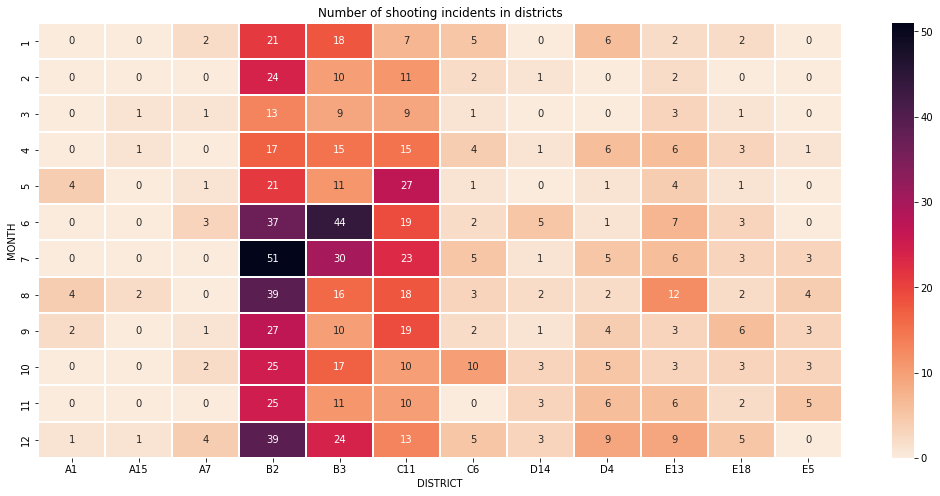

In [356]:
plt.figure(figsize=(18,8))
shooting_and_month = crime.groupby(['MONTH', 'DISTRICT']).count()['SHOOTING'].unstack()
sns.heatmap(shooting_and_month, cmap=sns.color_palette("rocket_r", as_cmap=True),
            linewidth=.03, linecolor="White", annot=True, fmt=".0f" )
plt.title('Number of shooting incidents in districts')

**The district "B2" has the highest number of shooting incidents with a count of 339. This is followed by "B3" with 215 shooting incidents, and "C11" with 181 shooting incidents.
It is important to note that these districts are all located in Boston, which suggests that Boston has a higher rate of shooting incidents compared to other cities.**

___10. In which districts were the highest number of crimes reported on a yearly basis?___

In [270]:
# Get the districts by crime count
crime_by_districts = crime.DISTRICT.value_counts()

In [271]:
crime_by_districts

B2     49940
C11    42528
D4     41914
A1     35710
B3     35441
       ...  
E13    17534
E18    17347
A7     13544
E5     13238
A15     6505
Name: DISTRICT, Length: 12, dtype: int64

In [323]:
district_and_year = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

Text(0.5, 1.0, 'Yearly count of crimes committed in districts')

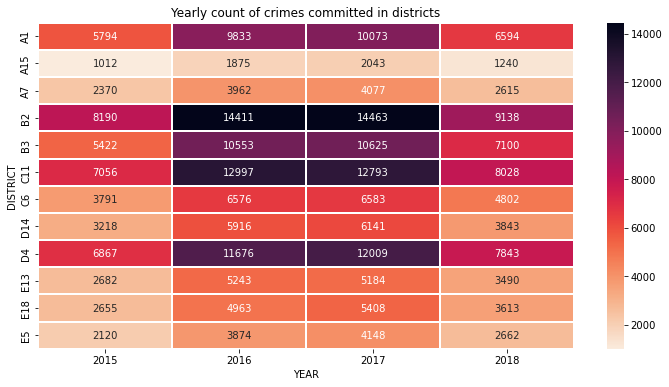

In [316]:
plt.figure(figsize=(12,6))

district_and_year = crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()
sns.heatmap(district_and_year, cmap=sns.color_palette("rocket_r", as_cmap=True),
            linewidth=.03, linecolor="White", annot=True, fmt=".0f" )
plt.title('Yearly count of crimes committed in districts')

**The districts with the highest number of reported crimes vary from year to year, but generally include District D4 (South End), District B2 (Roxbury), and District C11 (Dorchester).**

___11. In which months do the highest number of crimes occur on average?___

In [322]:
year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack().round()
year_and_month

YEAR,2015,2016,2017,2018
MONTH,,,,
1,NaN,7520.0,7503.0,7303.0
2,NaN,6809.0,6914.0,6474.0
3,NaN,7596.0,7588.0,7261.0
4,NaN,7575.0,7535.0,7469.0
5,NaN,7990.0,8124.0,8289.0
...,...,...,...,...
8,8023.0,8198.0,8521.0,7789.0
9,8046.0,7858.0,8348.0,662.0
10,7956.0,7893.0,8214.0,NaN


In [320]:
crime_months_top5 = crime.groupby('MONTH').count()['INCIDENT_NUMBER'].nlargest(5)
crime_months_top5

MONTH
8    32531
7    32427
6    28721
9    24914
5    24403
Name: INCIDENT_NUMBER, dtype: int64

In [314]:
# if the value is less than the average crime per month, highlight the value in blue

avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(round(avg_crime)))

year_and_month = crime.groupby(['MONTH', 'YEAR']).count()['INCIDENT_NUMBER'].unstack().round()

def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)\
                .format("{:.0f}")\
                .set_properties(**{'width': '100px', 'font-size': '10pt'})

# Use apply to highlight the maximum in a column in darkgreen
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

The average number of crimes is 7476


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7520,7503,7303
2,nan,6809,6914,6474
3,nan,7596,7588,7261
4,nan,7575,7535,7469
5,nan,7990,8124,8289
6,4063,8029,8387,8242
7,8032,7997,8423,7975
8,8023,8198,8521,7789
9,8046,7858,8348,662


**On average, the most crimes occur during the summer months of June, July, and August.**